# 1.0. Imports

In [1]:
import pandas   as pd
import sweetviz as sv
import seaborn as sns

import xgboost as xgb
from sklearn  import ensemble        as en
from sklearn  import neighbors       as nh
from sklearn  import linear_model    as lm
from sklearn  import model_selection as ms
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

from matplotlib import pyplot as plt

from IPython.core.display  import HTML

/opt/anaconda/envs/hackdays/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Helper Functions

In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()  

In [3]:
jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Loading Data

In [4]:
df_raw = pd.read_csv( '../data/train.csv')
test_raw = pd.read_csv( '../data/test.csv')
df_raw.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,uid,bank_account
0,Rwanda,2016,uniqueid_4858,Rural,Yes,6,45,Male,Head of Household,Divorced/Seperated,Primary education,Farming and Fishing,Rwanda_uniqueid_4858,No
1,Tanzania,2017,uniqueid_3015,Urban,No,4,33,Female,Head of Household,Single/Never Married,Primary education,Self employed,Tanzania_uniqueid_3015,No
2,Rwanda,2016,uniqueid_103,Rural,Yes,7,43,Male,Head of Household,Married/Living together,Secondary education,Farming and Fishing,Rwanda_uniqueid_103,No
3,Rwanda,2016,uniqueid_4582,Rural,No,6,35,Female,Head of Household,Married/Living together,Primary education,Farming and Fishing,Rwanda_uniqueid_4582,No
4,Tanzania,2017,uniqueid_2854,Urban,Yes,2,30,Male,Head of Household,Single/Never Married,Primary education,Informally employed,Tanzania_uniqueid_2854,No


# 1.0. Descrição dos Dados

In [5]:
df1 = df_raw.copy()

## Data Dimensions

In [6]:
print(f'number of rows: {df1.shape[0]}')
print(f'number of columns: {df1.shape[1]}')

number of rows: 11762
number of columns: 14


## Data Types

In [7]:
df1.dtypes

country                   object
year                       int64
uniqueid                  object
location_type             object
cellphone_access          object
household_size             int64
age_of_respondent          int64
gender_of_respondent      object
relationship_with_head    object
marital_status            object
education_level           object
job_type                  object
uid                       object
bank_account              object
dtype: object

## Check Na

In [8]:
df1.isna().sum()

country                   0
year                      0
uniqueid                  0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
uid                       0
bank_account              0
dtype: int64

In [9]:
df1['bank_account'].value_counts()

No     10077
Yes     1685
Name: bank_account, dtype: int64

## Descriptive Statistical

Feature: relationship_with_head              |██████▋   | [ 67%]   00:01 -> (00:00 left)/opt/anaconda/envs/hackdays/lib/python3.9/site-packages/sweetviz/utils.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clamped_series = clamped_series.append(other_series, ignore_index=False)
Feature: education_level                     |████████  | [ 80%]   00:01 -> (00:00 left)/opt/anaconda/envs/hackdays/lib/python3.9/site-packages/sweetviz/utils.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clamped_series = clamped_series.append(other_series, ignore_index=False)
Feature: job_type                            |████████▋ | [ 87%]   00:01 -> (00:00 left)/opt/anaconda/envs/hackdays/lib/python3.9/site-packages/sweetviz/utils.py:34: FutureWarning: The series.append method is deprecated and will be removed from panda


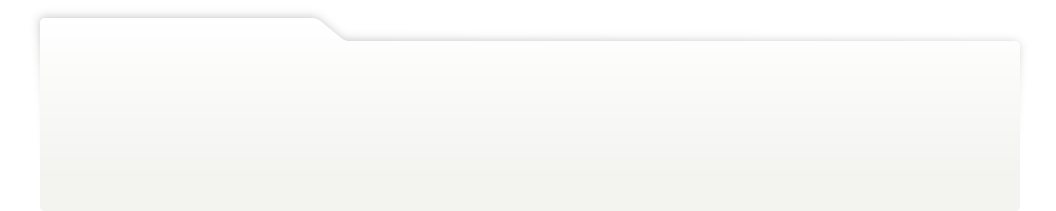
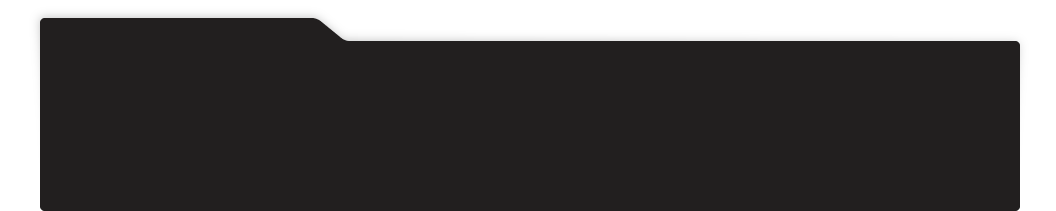
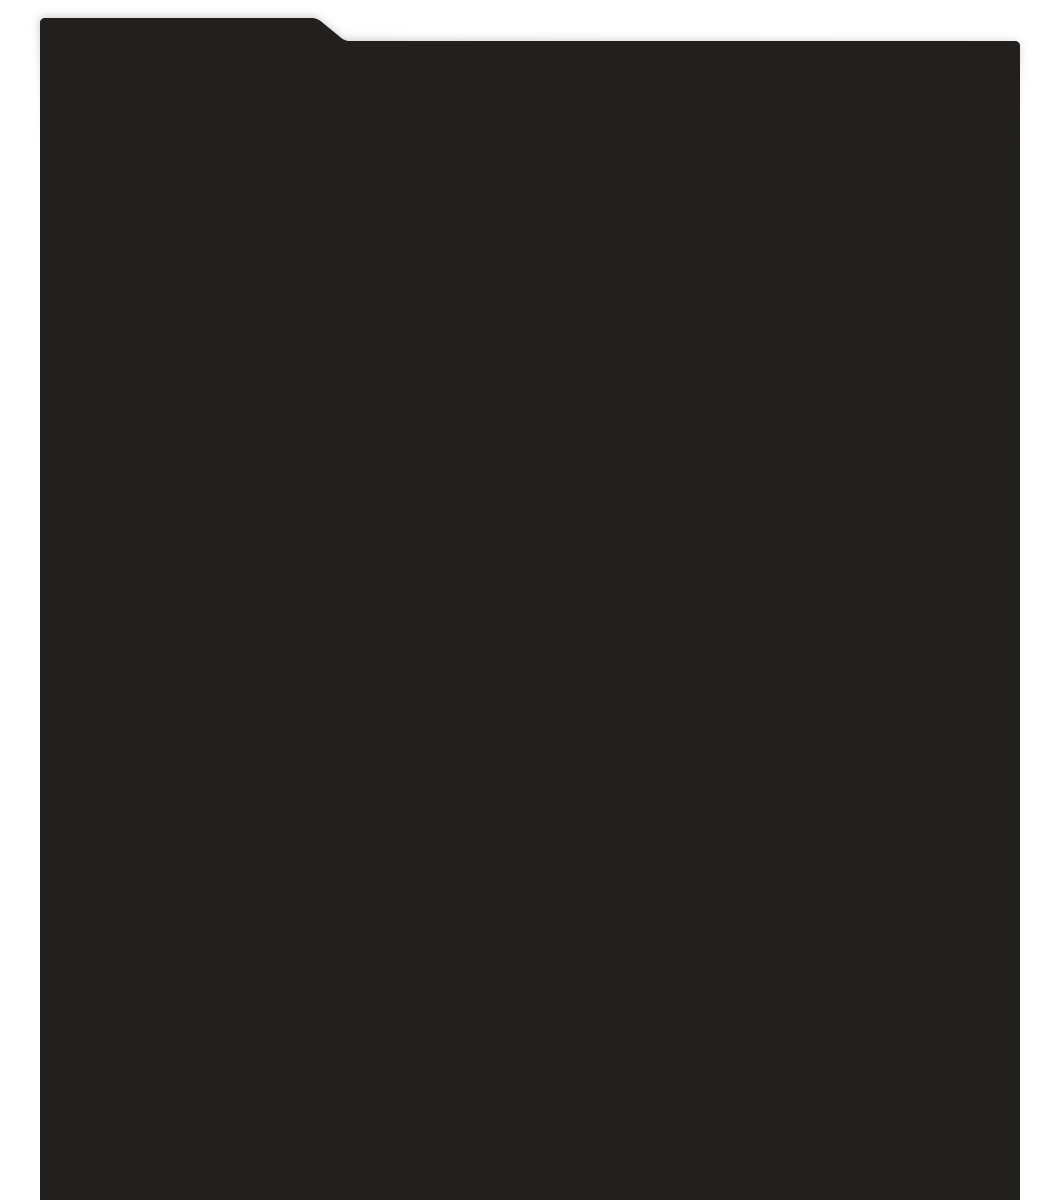
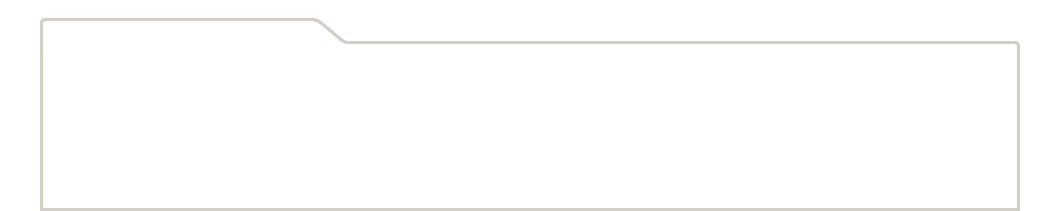
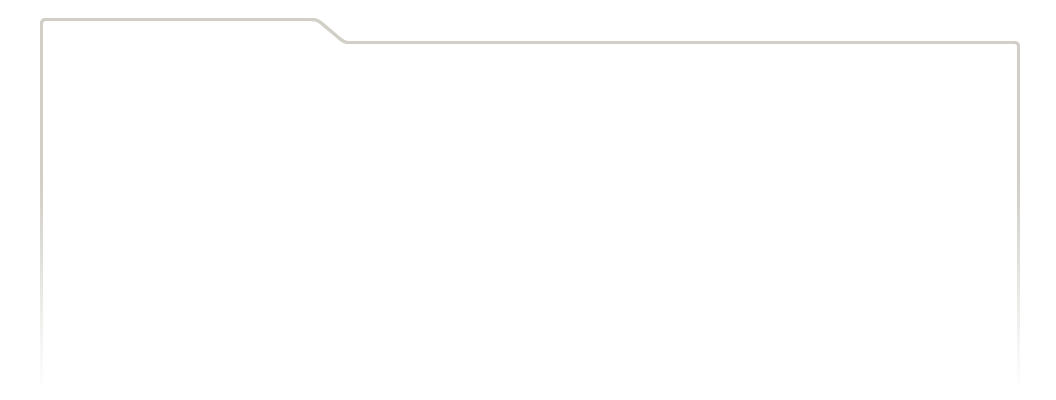
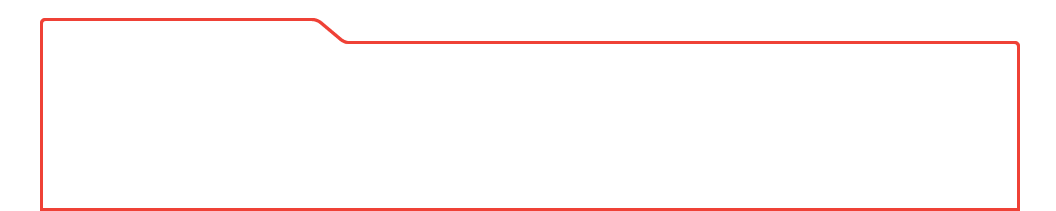
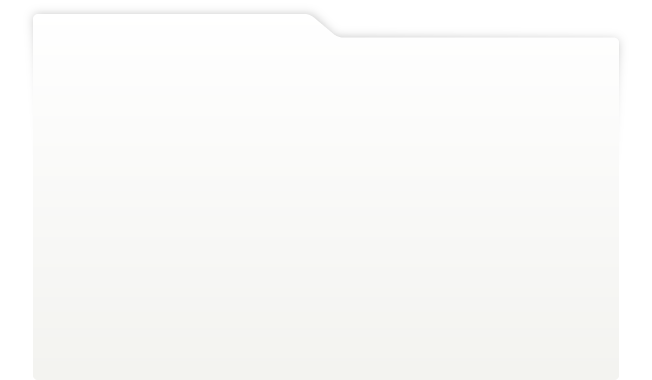
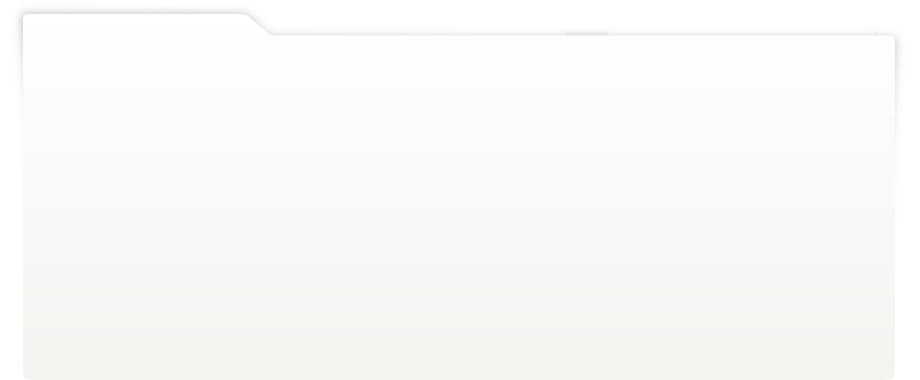
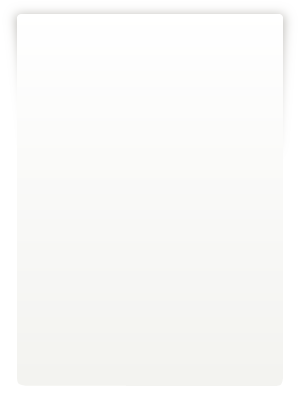
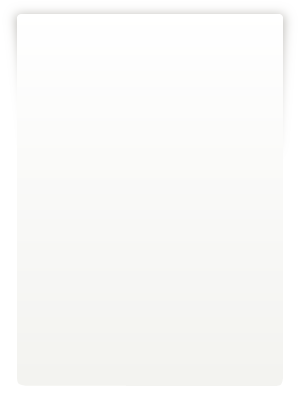
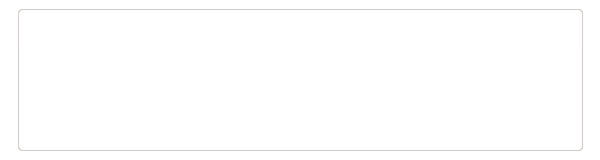
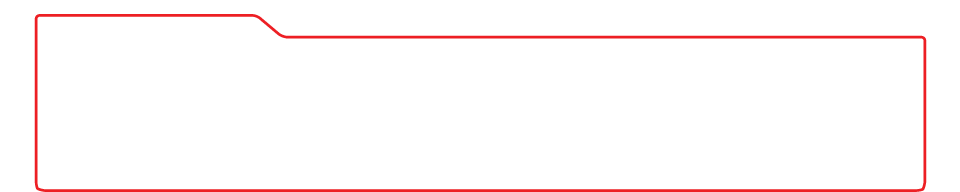
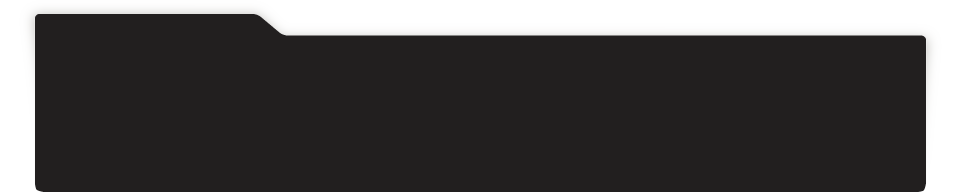
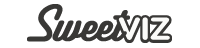
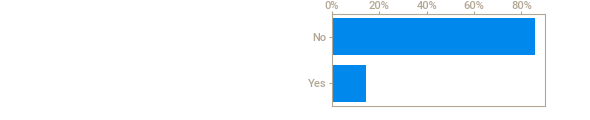
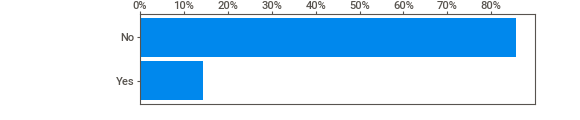
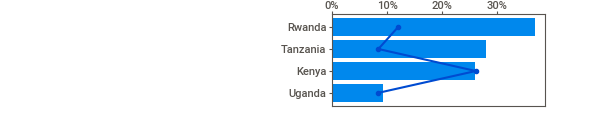
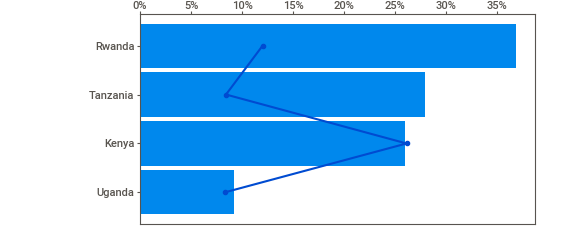
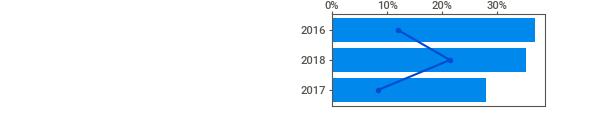
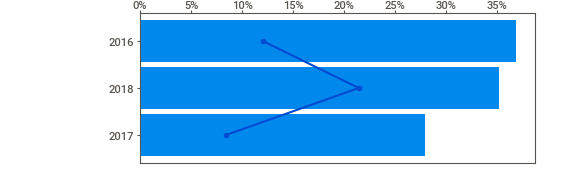
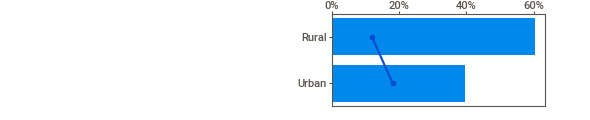
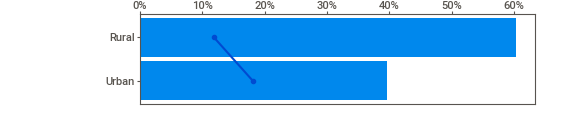
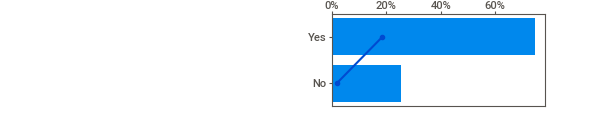
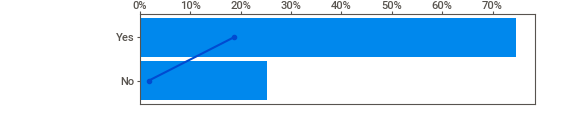
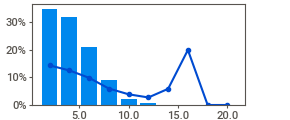
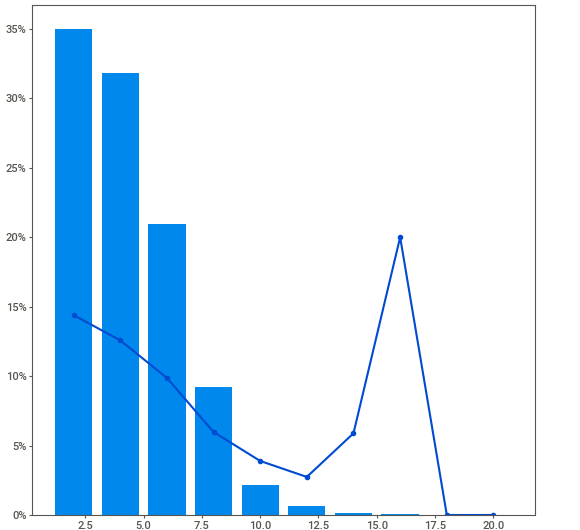
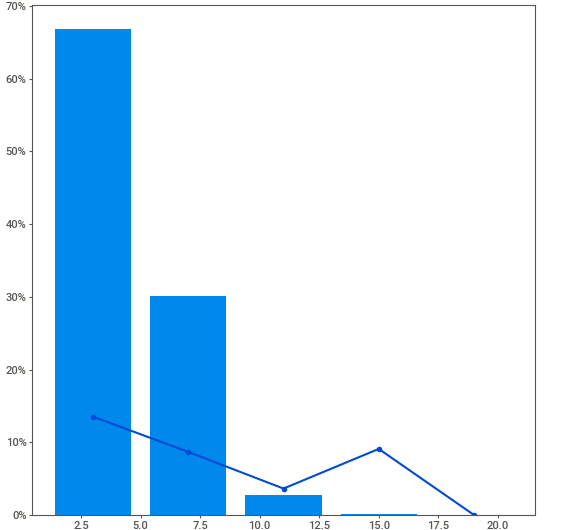
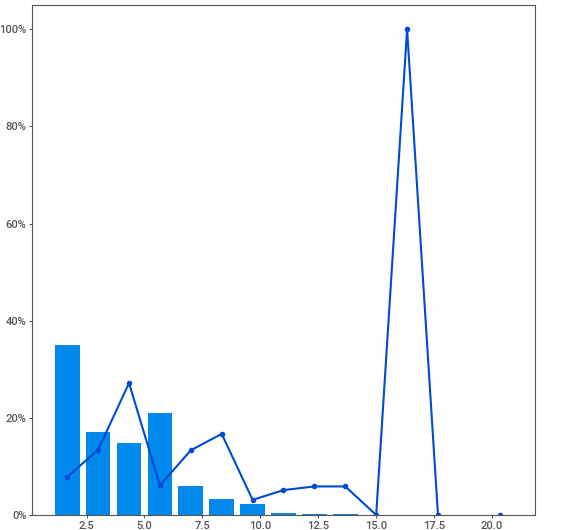
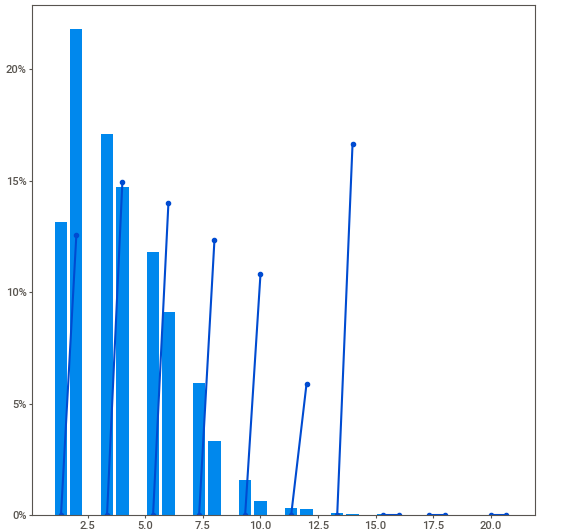
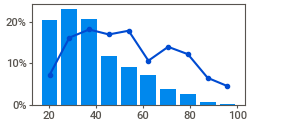
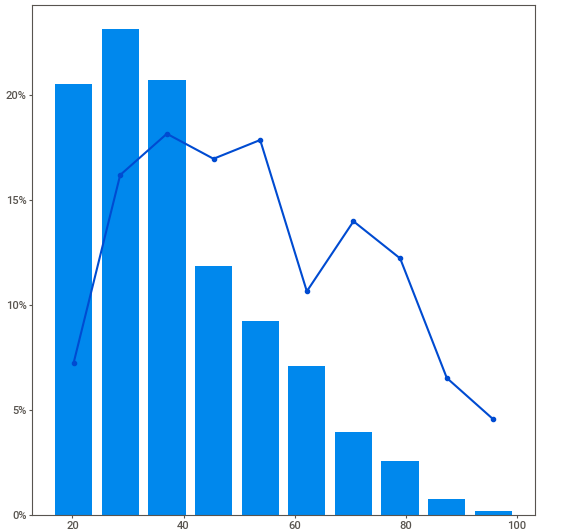
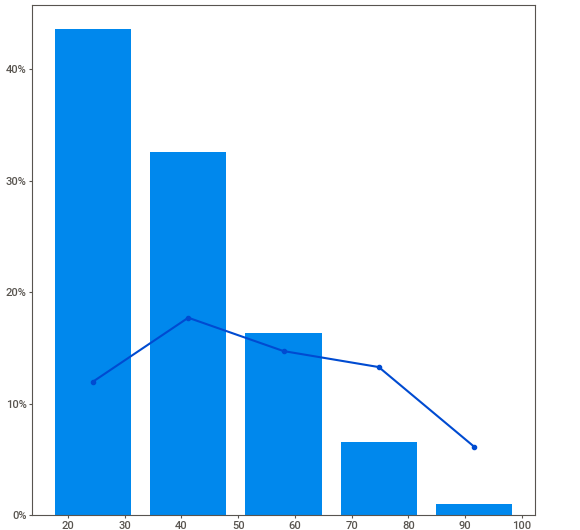
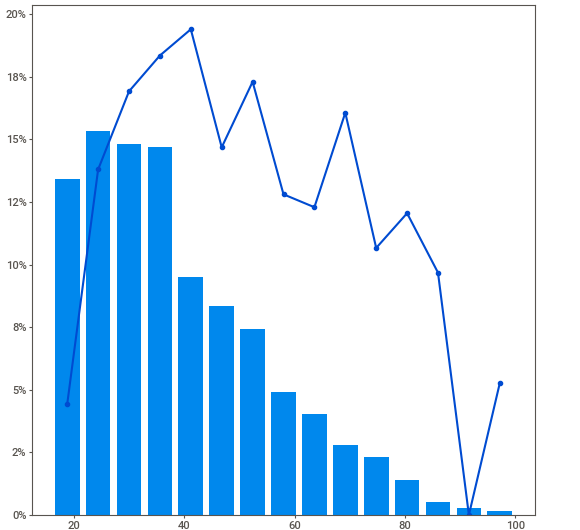
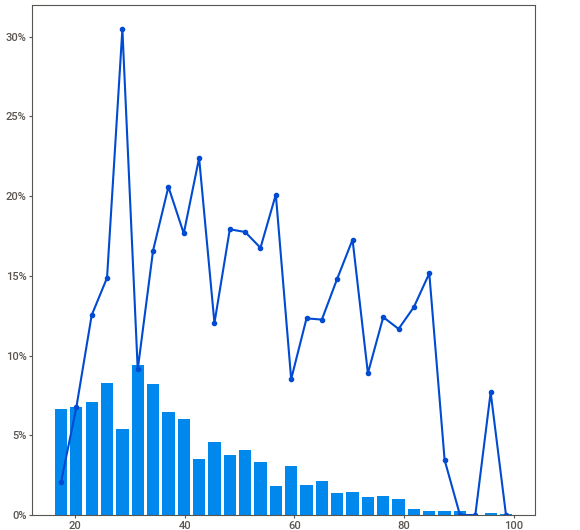
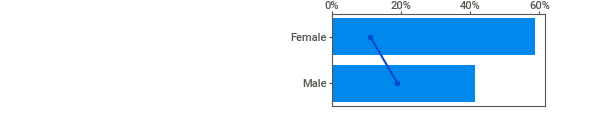
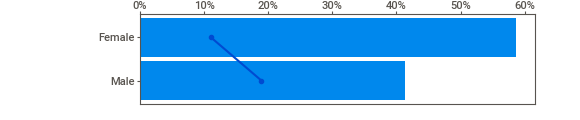
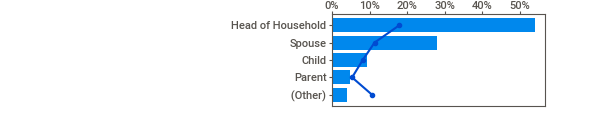
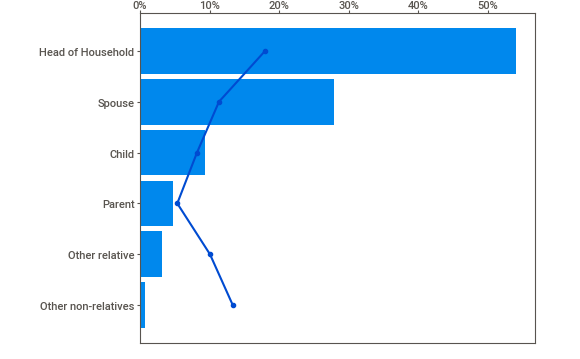
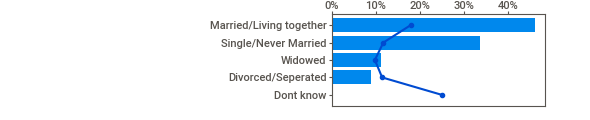
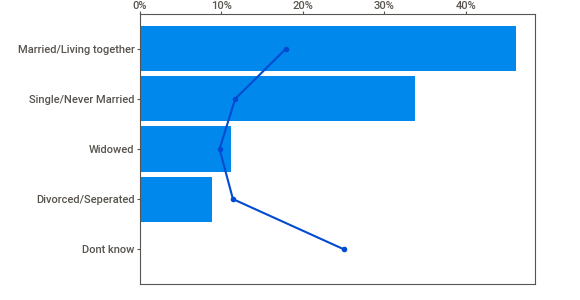
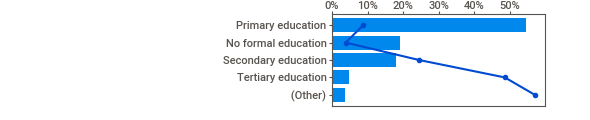
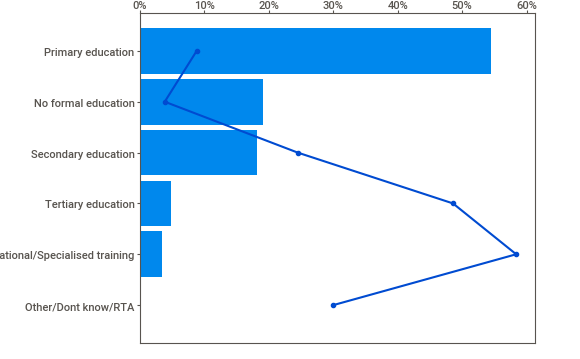
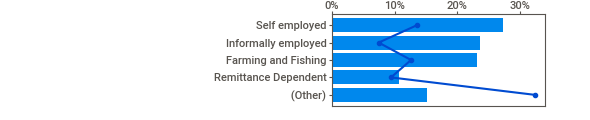
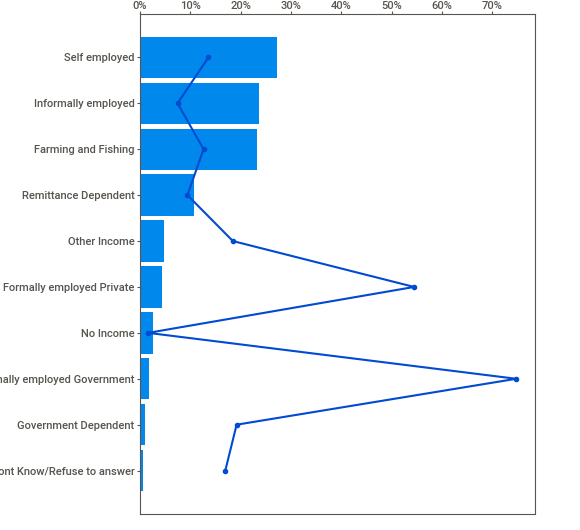
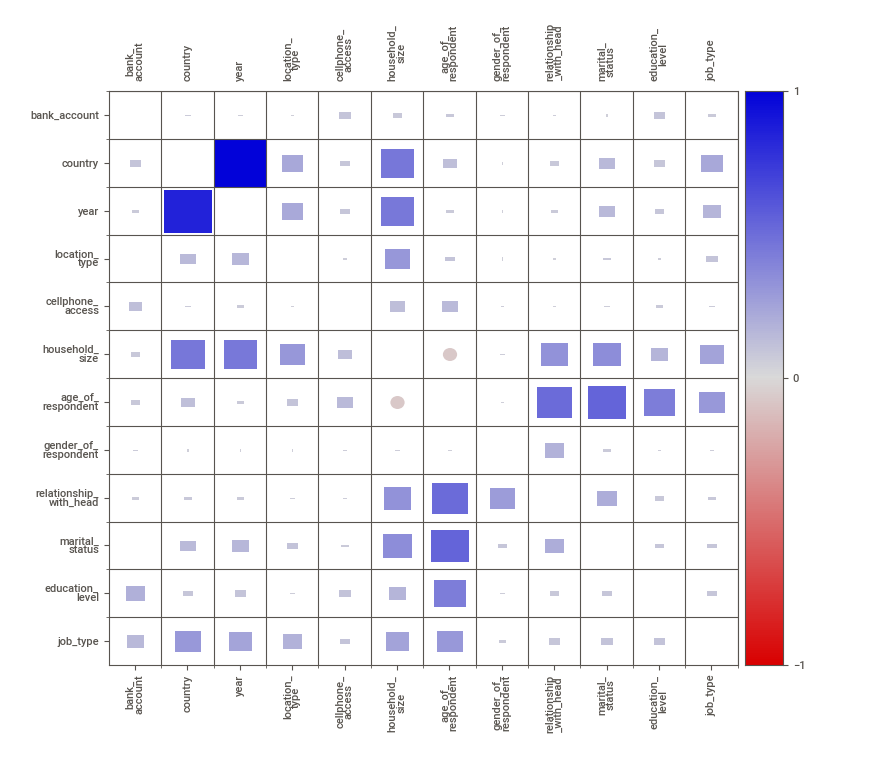
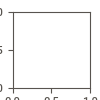

In [45]:
# Analyse Dataset
report = sv.analyze(source = df1, target_feat = 'bank_account')
# View
report.show_notebook(w="100%", h="full")

# 2.0 EDA

In [11]:
df2 = df1.copy()

## Bivariate Analysis

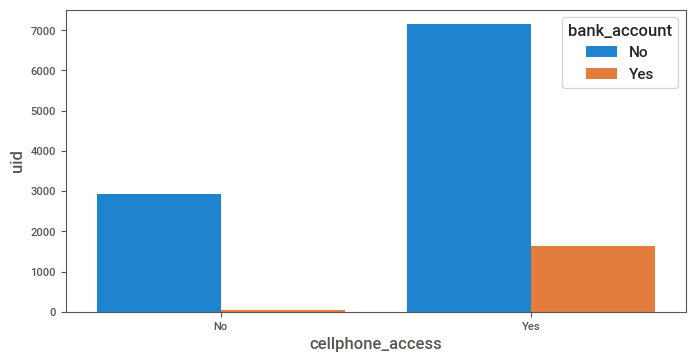

In [54]:
plt.figure(figsize=(8, 4))
aux = df2[['cellphone_access', 'uid', 'bank_account']].groupby(['cellphone_access', 'bank_account']).count().reset_index()

sns.barplot(data= aux, x='cellphone_access', y='uid', hue='bank_account');

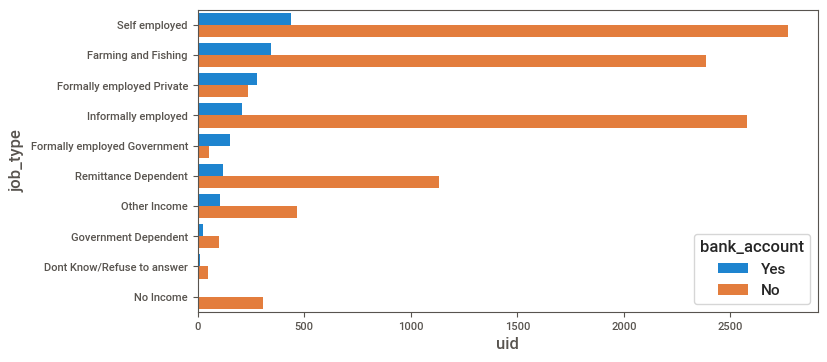

In [53]:
plt.figure(figsize=(8, 4))
aux = df2[['job_type', 'uid', 'bank_account']].groupby(['job_type', 'bank_account']).count().reset_index().sort_values(['bank_account','uid'], ascending=False)

sns.barplot(data= aux, x='uid', y='job_type', hue='bank_account');

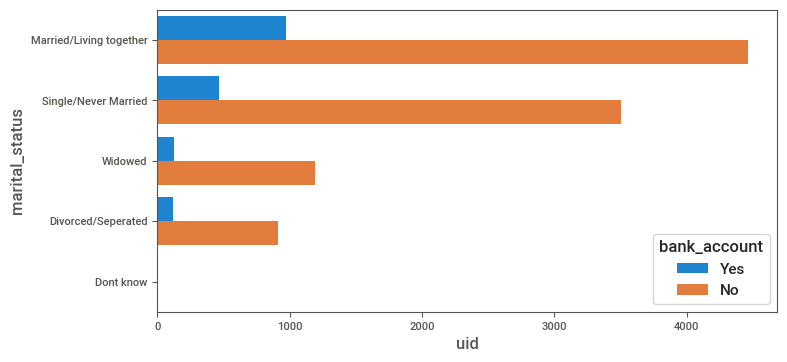

In [51]:
plt.figure(figsize=(8, 4))
aux = df2[['marital_status', 'uid', 'bank_account']].groupby(['marital_status', 'bank_account']).count().reset_index().sort_values(['bank_account','uid'], ascending=False)

sns.barplot(data= aux, x='uid', y='marital_status', hue='bank_account');

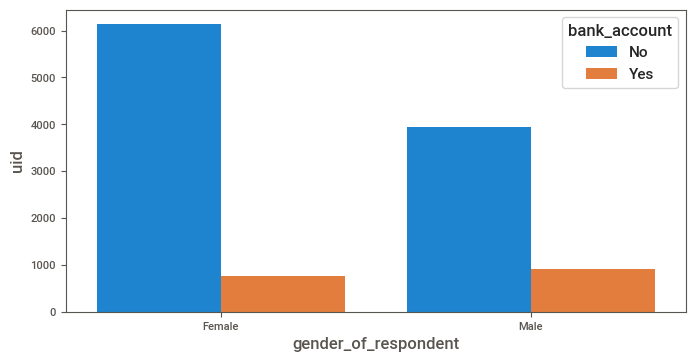

In [57]:
plt.figure(figsize=(8, 4))
aux = df2[['gender_of_respondent', 'uid', 'bank_account']].groupby(['gender_of_respondent', 'bank_account']).count().reset_index()

sns.barplot(data= aux, x='gender_of_respondent', y='uid', hue='bank_account');

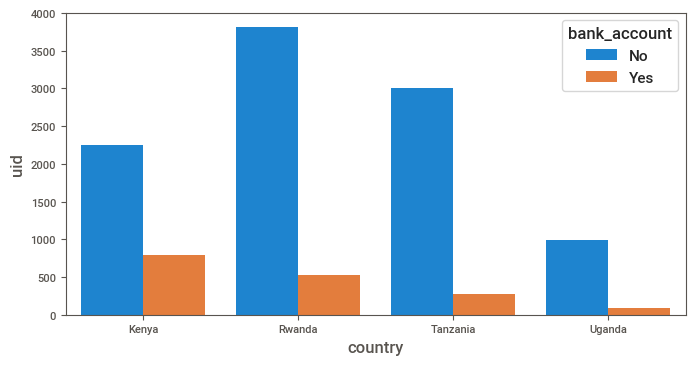

In [58]:
plt.figure(figsize=(8, 4))
aux = df2[['country', 'uid', 'bank_account']].groupby(['country', 'bank_account']).count().reset_index()

sns.barplot(data= aux, x='country', y='uid', hue='bank_account');

# 3.0. FEATURE ENGINEERING

In [12]:
df3 = df2.copy()

## Deserialization

In [13]:
df3['age_of_respondent'] = df3['age_of_respondent'].apply( lambda x: 'Jovem' if x <= 26 else
                                                                     'Adulto' if (x > 26) | (x <= 35) else
                                                                     'Meia idade' if (x > 35) | (x <= 48) else
                                                                     'Idoso') 

## Encoding

In [14]:
#One Hot Encoding
df3 = pd.get_dummies(df3, columns=['age_of_respondent'], prefix = ['aor'])
df3 = pd.get_dummies(df3, columns=['marital_status'], prefix = ['ms'])
df3 = pd.get_dummies(df3, columns=['job_type'], prefix = ['jt'])
df3 = pd.get_dummies(df3, columns=['country'], prefix = ['c'])


# Transformation
df3['bank_account']=df3['bank_account'].apply(lambda x: 1 if x=='Yes' else 0)
df3['gender_of_respondent']=df3['gender_of_respondent'].apply(lambda x: 1 if x=='Male' else 0)
df3['location_type']=df3['location_type'].apply(lambda x:1 if x=='Rural' else 0)
df3['cellphone_access']=df3['cellphone_access'].apply(lambda x:1 if x=='Yes' else 0)


f_edu = df3.groupby('education_level').size() / len(df3)
df3.education_level = df3.education_level.apply(lambda x: f_edu[x])

<AxesSubplot:>

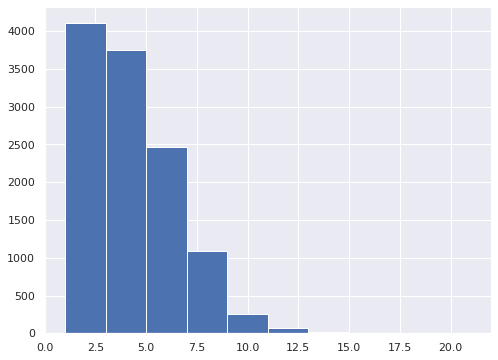

In [15]:
plt.figure(figsize=(8,6))
df3['household_size'].hist()

In [16]:
df3['household_size'] = np.log(df3.household_size)

<AxesSubplot:>

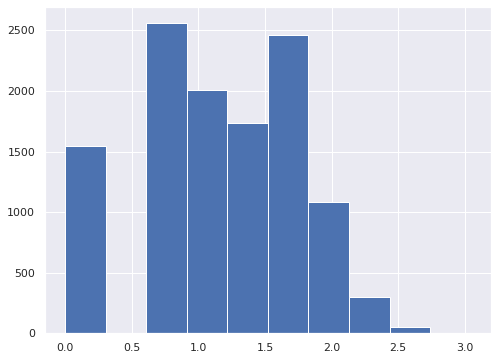

In [17]:
plt.figure(figsize=(8,6))
df3['household_size'].hist()

# 4.0. Data Preparation

In [18]:
df4 = df3.copy()

In [19]:
df4.head()

,year,uniqueid,location_type,cellphone_access,household_size,gender_of_respondent,relationship_with_head,education_level,uid,bank_account,aor_Adulto,aor_Jovem,ms_Divorced/Seperated,ms_Dont know,ms_Married/Living together,ms_Single/Never Married,ms_Widowed,jt_Dont Know/Refuse to answer,jt_Farming and Fishing,jt_Formally employed Government,jt_Formally employed Private,jt_Government Dependent,jt_Informally employed,jt_No Income,jt_Other Income,jt_Remittance Dependent,jt_Self employed,c_Kenya,c_Rwanda,c_Tanzania,c_Uganda
0,2016,uniqueid_4858,1,1,1.791759,1,Head of Household,0.544805,Rwanda_uniqueid_4858,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,2017,uniqueid_3015,0,0,1.386294,0,Head of Household,0.544805,Tanzania_uniqueid_3015,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,2016,uniqueid_103,1,1,1.945910,1,Head of Household,0.181007,Rwanda_uniqueid_103,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,2016,uniqueid_4582,1,0,1.791759,0,Head of Household,0.544805,Rwanda_uniqueid_4582,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,2017,uniqueid_2854,0,1,0.693147,1,Head of Household,0.544805,Tanzania_uniqueid_2854,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


## Split dataframe into training and testing

In [20]:
X = df4.drop(['uniqueid', 'bank_account','uid','year', 'relationship_with_head'],axis=1)
Y = df4['bank_account'].copy()

X_train, X_val, y_train, y_val = ms.train_test_split( X, Y, test_size=0.20 )

# Models

## Random Forest

In [21]:
# model definition
rf = en.RandomForestClassifier()

# model training
rf.fit( X_train, y_train )

# model prediction
y_pred_rf = rf.predict( X_val )

In [22]:
print("Accuracy: %.2f%%" % (accuracy_score(y_val, y_pred_rf)*100))
print("F1 (micro): %.2f%%" % (f1_score(y_val, y_pred_rf, average = 'micro')*100))
print("F1(macro): %.2f%%" % (f1_score(y_val, y_pred_rf, average = 'macro')*100))

Accuracy: 86.27%
F1 (micro): 86.27%
F1(macro): 68.66%


## LGBM Classifier

In [23]:
# model definition
lgbm_model = LGBMClassifier()

#model training
lgbm_model.fit( X_train, y_train )

# prediction
y_pred_lgbm = lgbm_model.predict( X_val )

In [24]:
print("Accuracy: %.2f%%" % (accuracy_score(y_val, y_pred_lgbm)*100))
print("F1 (micro): %.2f%%" % (f1_score(y_val, y_pred_lgbm, average = 'micro')*100))
print("F1(macro): %.2f%%" % (f1_score(y_val, y_pred_lgbm, average = 'macro')*100))

Accuracy: 87.34%
F1 (micro): 87.34%
F1(macro): 69.13%


## KNN Classifier

In [25]:
# model definition
knn_model = nh.KNeighborsClassifier()

# model training
knn_model.fit( X_train, y_train )

# model prediction
y_pred_knn = knn_model.predict( X_val )

In [26]:
print("Accuracy: %.2f%%" % (accuracy_score(y_val, y_pred_knn)*100))
print("F1 (micro): %.2f%%" % (f1_score(y_val, y_pred_knn, average = 'micro')*100))
print("F1(macro): %.2f%%" % (f1_score(y_val, y_pred_knn, average = 'macro')*100))

Accuracy: 86.06%
F1 (micro): 86.06%
F1(macro): 66.76%


## XGBClassifier

In [27]:
# model definition
xgb_model = xgb.XGBClassifier()

# model training
xgb_model.fit( X_train, y_train )

# model prediction
y_pred_xgb = xgb_model.predict( X_val )

In [28]:
print("Accuracy: %.2f%%" % (accuracy_score(y_val, y_pred_xgb)*100))
print("F1 (micro): %.2f%%" % (f1_score(y_val, y_pred_xgb, average = 'micro')*100))
print("F1(macro): %.2f%%" % (f1_score(y_val, y_pred_xgb, average = 'macro')*100))

Accuracy: 87.59%
F1 (micro): 87.59%
F1(macro): 70.50%


## Logistic Regression

In [29]:
# model definition
lr_model = lm.LogisticRegression() 

# model training
lr_model.fit( X_train, y_train )

# model prediction
y_pred_lr = lr_model.predict( X_val )

In [30]:
print("Accuracy: %.2f%%" % (accuracy_score(y_val, y_pred_lr)*100))
print("F1 (micro): %.2f%%" % (f1_score(y_val, y_pred_lr, average = 'micro')*100))
print("F1(macro): %.2f%%" % (f1_score(y_val, y_pred_lr, average = 'macro')*100))

Accuracy: 87.46%
F1 (micro): 87.46%
F1(macro): 65.97%


# Test Submission

In [31]:
test = test_raw.copy()
test.sample()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,uid
8622,Tanzania,2017,uniqueid_643,Urban,Yes,2,26,Male,Head of Household,Single/Never Married,Primary education,Self employed,Tanzania_uniqueid_643


## Variable Encoding

In [32]:
def encoding(test):

    test['age_of_respondent'] = test['age_of_respondent'].apply( lambda x: 'Jovem' if x <= 26 else
                                                                         'Adulto' if (x > 26) | (x <= 35) else
                                                                         'Meia idade' if (x > 35) | (x <= 48) else
                                                                         'Idoso') 

    #One Hot Encoding
    test = pd.get_dummies(test, columns=['age_of_respondent'], prefix = ['aor'])
    test = pd.get_dummies(test, columns=['marital_status'], prefix = ['ms'])
    test = pd.get_dummies(test, columns=['job_type'], prefix = ['jt'])
    test = pd.get_dummies(test, columns=['country'], prefix = ['c'])


    # Transformation
    #test['bank_account']=test['bank_account'].apply(lambda x: 1 if x=='Yes' else 0)
    test['gender_of_respondent']=test['gender_of_respondent'].apply(lambda x: 1 if x=='Male' else 0)
    test['location_type']=test['location_type'].apply(lambda x:1 if x=='Rural' else 0)
    test['cellphone_access']=test['cellphone_access'].apply(lambda x:1 if x=='Yes' else 0)


    f_edu = test.groupby('education_level').size() / len(test)
    test.education_level = test.education_level.apply(lambda x: f_edu[x])
    
    return test

In [33]:
test = encoding( test )
test.sample()

,year,uniqueid,location_type,cellphone_access,household_size,gender_of_respondent,relationship_with_head,education_level,uid,aor_Adulto,aor_Jovem,ms_Divorced/Seperated,ms_Dont know,ms_Married/Living together,ms_Single/Never Married,ms_Widowed,jt_Dont Know/Refuse to answer,jt_Farming and Fishing,jt_Formally employed Government,jt_Formally employed Private,jt_Government Dependent,jt_Informally employed,jt_No Income,jt_Other Income,jt_Remittance Dependent,jt_Self employed,c_Kenya,c_Rwanda,c_Tanzania,c_Uganda
11353,2017,uniqueid_4955,0,0,2,1,Head of Household,0.54268,Tanzania_uniqueid_4955,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


## Training Model

In [34]:
X = df4.drop(['uniqueid', 'bank_account','uid','year', 'relationship_with_head'],axis=1)
Y = df4['bank_account'].copy()

X_train = X
y_train = Y

# XGBClassifier
#xgb_model_final = xgb.XGBClassifier()
#xgb_mo#del_final.fit(X_train, y_train)

# LGBMClassifier
lgbm_model_final = LGBMClassifier()
lgbm_model_final.fit(X_train, y_train)

LGBMClassifier()

In [35]:
# Create a list of columns to be used for the predictions
wanted_test_columns = X_train.columns
wanted_test_columns

Index(['location_type', 'cellphone_access', 'household_size',
       'gender_of_respondent', 'education_level', 'aor_Adulto', 'aor_Jovem',
       'ms_Divorced/Seperated', 'ms_Dont know', 'ms_Married/Living together',
       'ms_Single/Never Married', 'ms_Widowed',
       'jt_Dont Know/Refuse to answer', 'jt_Farming and Fishing',
       'jt_Formally employed Government', 'jt_Formally employed Private',
       'jt_Government Dependent', 'jt_Informally employed', 'jt_No Income',
       'jt_Other Income', 'jt_Remittance Dependent', 'jt_Self employed',
       'c_Kenya', 'c_Rwanda', 'c_Tanzania', 'c_Uganda'],
      dtype='object')

In [36]:
predictions = lgbm_model_final.predict(test[wanted_test_columns])

In [37]:
submission = pd.DataFrame({'uid': test.uid, 'bank_account': predictions})

In [38]:
submission.dtypes

uid             object
bank_account     int64
dtype: object

In [39]:
submission['bank_account'].value_counts()

0    11135
1      627
Name: bank_account, dtype: int64

In [40]:
submission['bank_account'] = submission['bank_account'].apply(lambda x: 'Yes' if x== 1 else 'No')

In [161]:
submission.sample(10)

,uid,bank_account
11047,Rwanda_uniqueid_3023,No
6028,Kenya_uniqueid_821,Yes
4802,Kenya_uniqueid_1154,Yes
2785,Kenya_uniqueid_2151,Yes
135,Rwanda_uniqueid_5409,No
838,Uganda_uniqueid_493,No
8951,Tanzania_uniqueid_4995,No
4658,Tanzania_uniqueid_4443,No
6835,Kenya_uniqueid_6067,No
7529,Tanzania_uniqueid_159,No
